# importing the necessary library

In [46]:
import numpy as np #array manipulation
import pandas as pd #meaningful extrction
import matplotlib.pyplot as plt #visualization purpose
import seaborn as sns #advanced version of pandas

# loading the Datasets

In [ ]:
df = pd.read_csv('Data_sets/Student_data.csv') #relative location

In [ ]:
#data explorations and the initial inspection
df.head() #it gives the first fiverows of dataframe

In [ ]:
!pip install seaborn

# indormations about the data

In [ ]:
df.info() 

In [ ]:
df.select_dtypes(include=['category','object']).columns

In [ ]:
df.describe()
#describing the summary of the datasets

In [ ]:
#visulization of shape of the data
df.shape #it gives number of rows and columns

In [ ]:
#vision over a columns in a datasets
list(df.columns) #it gives the list of columns

In [ ]:
#finding the missing columns
df.isnull().sum() #it detect missing values and provide its count

In [ ]:
#listing the categorical and the numerical columns

In [ ]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [ ]:
#filling the missing values in a categorical columns with mode

#before missing values in a ctegorial columns
df[categorical_columns].isnull().sum()

In [ ]:
df['Mjob'].mode(0)

In [ ]:
df['Fjob'].mode(0)

In [ ]:
#filling missing values
df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [ ]:
#after filling the missing value.
df[categorical_columns].isnull().sum()

# filling a missing values with mean or median in numerical columns only

In [ ]:
df[numerical_columns].isnull().sum()

# Detecting outliar

In [ ]:
#plotting box plot to visualize outliar 

plt.figure(figure=(10,6))
sns.boxplot(data = df[numerical_columns])
plt.xticks(rotation=45)
plt.title('box plot of numercal columns')
plt.show()

In [ ]:
#if we have large outliar it better to use medain to fill the missing valus

#filling outliar with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [ ]:
#after filling missing values with mean
df[numerical_columns].isnull().sum()

In [ ]:
df[numerical_columns].head()

In [ ]:
df[categorical_columns].head()

# To determine whether numerical columns follow a normal distribution, you can perform statistical tests or cisual inspections. Normal distribution, also known as Gaussian distribution,is characterized by a bell-shaped curve where the data cluster around the mean, with most values close to the mean and fewer values farther away


In [ ]:
#visual inspection: create visualizationn like histograms or qq plots(quantitile-quantitile plots) to visually assess the distribution of your
#numerical data. A histogram can show the shape of the data distribution, while a QQ plot compares the quantiles of your data against those
#expected from a normal distribution. A linear pattern in a QQ plot suggests the data is normally distributed.

#in simple words we using histogram and QQ plot to see whether the data are normally distributed or not
#in case of histogram if it gives data in bell shaped then it is normally distributed
#in case of QQ if  fits a line to the data, representing the expected quantiles if the data were normally distributed.

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np


# Create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols * 4))

# Plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], 
                 stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    
    # Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0)  # Adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q Plot for {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

# Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()



# Statistical tests: use statistical ethods sunch as the shapiro-wilk test or kolmogorov-smirnov test. These evaluate whether a sample of data, comes from a normal diztribution. If the p-value from these tests is greater than a chosen significance level(eg=0.05) it suggests that the data may follow an normal distribution

# descriptive statistics: calculate descriptive statistics sunch as mean,median and dtandard deviation. for normally distributed data. the mean and median are are typically close in vlaue and about 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors  #corrected import

In [ ]:
!pip install scipy

In [ ]:
!pip install statsmodels

# functionn to detect outliers using iqr method and return colum-wise

In [ ]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")

# function to detect outliers using z-score method and return column-wise boolean indicators

In [ ]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")

# Exploytary Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = df[numerical_columns]

#compute pairwise correlation of numeric columns
correlation_matrix = numeric_data.corr()

#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm',fmt='.2f',square=True)
plt.title('correlation Matrix of Numeric Features')
plt.show()

In [ ]:
 #pairplot of numeric features 
sns.pairplot(df[numerical_columns],diag_kind='kide')
plt.suptitle('pairplot of numeric features',y=1.02)
plt.show()

In [ ]:
df.head()

In [ ]:
print(list(df.columns))

In [ ]:
#feature engineering
df['GPA'] = df['G3']/5  #since G3 ranges from 0 to 20
#create new column 'pass/fail' based on GPA condition
df['pass/fail'] = df['G3'].apply(lambda x: 'pass' if x>= 12 else 'fail')

df.head()

In [ ]:
df['pass/fail'].value_counts()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Assuming df, pass/fail column, and GPA column are already defined as per your

#Exclude columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['pass', 'G3','pass/fail','GPA']]
#Calculate number of rows and columns for subplot grid
num_cols=2 #Number of columns in subplot layout
num_rows=(len(columns_to_plot)+1)//num_cols #calculate number of rows 
#Adjust figure size based on number of subplots
fig_width=15
fig_height=num_rows*5 # Adjust height based on number of rows
plt.figure(figsize=(fig_width, fig_height))

#Iterate through each column and plot
for i,col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i+1)
    pass_fail_cross=pd.crosstab(index=df[col], columns=df['pass/fail'])
    pass_fail_cross.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca(), legend=None)
    plt.title(f'Pass/Fail distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0) #Adjust spacing between subplots
 #Adjust layout and display the plot
plt.tight_layout()
plt.legend(['Fail','Pass'], loc='upper right')
plt.show()

In [ ]:
#iterate through each cloumn
for column in df.columns:
    #get unique values in the columns
    unique_values = df[column].unique()
    
#print the column name and its unique values
print(f"Unique values in {column} column: ")
print(unique_values)
print()

In [ ]:
df.head()

In [ ]:
list(df.columns)

In [89]:
df.to_csv('Data_sets/Filtered_data.csv',index=False)

# Loading and working with the FIltered Datasets and analysis of the data

In [94]:
import pandas as pd
data = pd.read_csv('Data_sets/Filtered_data.csv')

In [96]:
data.head(60)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,...,4.000000,3.000000,4,1,1,3,4,11,2.2,fail
1,KEC,F,17,U,GT3,T,1,1,at_home,other,...,5.000000,3.000000,3,1,1,3,2,11,2.2,fail
2,KEC,F,15,U,LE3,T,1,1,at_home,other,...,3.930341,3.180556,2,2,3,3,6,12,2.4,pass
3,KEC,F,15,U,GT3,T,4,2,health,services,...,3.000000,2.000000,2,1,1,5,0,14,2.8,pass
4,KEC,F,16,U,GT3,T,3,3,other,other,...,3.930341,3.000000,2,1,2,5,0,13,2.6,pass
5,KEC,M,16,U,LE3,T,4,3,services,other,...,5.000000,4.000000,2,1,2,5,6,13,2.6,pass
6,KEC,M,16,U,LE3,T,2,2,other,other,...,4.000000,4.000000,4,1,1,3,0,13,2.6,pass
7,KEC,F,17,U,GT3,A,4,4,other,teacher,...,4.000000,1.000000,4,1,1,1,2,13,2.6,pass
8,KEC,M,15,U,LE3,A,3,2,services,other,...,4.000000,2.000000,2,1,1,1,0,17,3.4,pass
9,KEC,M,15,U,GT3,T,3,4,other,other,...,5.000000,5.000000,1,1,1,5,0,13,2.6,pass


In [ ]:
data['Mjob'].vlaue_counts()

In [97]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3', 'GPA', 'pass/fail'],
      dtype='object')

In [100]:
# Dispaly the first few rows and all columns
pd.set_option('display.max_columns',None) #This will display all columns
print('first few rows of data:')
print(data.head())

first few rows of data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0    KEC   F   18       U     GT3       A     4     4  at_home   teacher   
1    KEC   F   17       U     GT3       T     1     1  at_home     other   
2    KEC   F   15       U     LE3       T     1     1  at_home     other   
3    KEC   F   15       U     GT3       T     4     2   health  services   
4    KEC   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic    famrel 

In [101]:
data.drop(columns=['school'],axis=1,inplace=True)
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.000000,3.000000,4,1,1,3,4,11,2.2,fail
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.000000,3.000000,3,1,1,3,2,11,2.2,fail
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,3.930341,3.180556,2,2,3,3,6,12,2.4,pass
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.000000,2.000000,2,1,1,5,0,14,2.8,pass
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,3.930341,3.000000,2,1,2,5,0,13,2.6,pass


In [111]:
numerical_cols = data.select_dtypes(exclude=['category','object']).columns
category_cols = data.select_dtypes(include=['category','object']).columns

In [112]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'GPA'],
      dtype='object')

In [113]:
for col in category_cols:
    unique_values = data[col].unique()
    print(f"unique values in '{col}' column:")
    for value in unique_values:
        print(value)
    print()

unique values in 'sex' column:
F
M

unique values in 'address' column:
U
R

unique values in 'famsize' column:
GT3
LE3

unique values in 'Pstatus' column:
A
T

unique values in 'Mjob' column:
at_home
health
other
services
teacher

unique values in 'Fjob' column:
teacher
other
services
health
at_home

unique values in 'reason' column:
course
other
home
reputation

unique values in 'guardian' column:
mother
father
other

unique values in 'schoolsup' column:
yes
no

unique values in 'famsup' column:
no
yes

unique values in 'paid' column:
no
yes

unique values in 'activities' column:
no
yes

unique values in 'nursery' column:
yes
no

unique values in 'higher' column:
yes
no

unique values in 'internet' column:
no
yes

unique values in 'romantic' column:
no
yes

unique values in 'pass/fail' column:
fail
pass



In [114]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.000000,3.000000,4,1,1,3,4,11,2.2,fail
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.000000,3.000000,3,1,1,3,2,11,2.2,fail
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,3.930341,3.180556,2,2,3,3,6,12,2.4,pass
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.000000,2.000000,2,1,1,5,0,14,2.8,pass
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,3.930341,3.000000,2,1,2,5,0,13,2.6,pass


# Drop numerical columns from data

In [115]:
data_categorical = data.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns

In [148]:
encoded_data = pd.get_dummies(data_categorical,columns = ['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities',
                                                         'nursery','higher','internet','romantic'])

In [149]:
encoded_data.head()

,pass/fail,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,fail,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,fail,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,pass,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False
3,pass,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
4,pass,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


In [150]:
data['age'].mean()

16.7442218798151

In [151]:
18-data['age'].mean()/data['age'].std()

4.25424472807355

In [152]:
data['age'].std()

1.2181376394800618

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#asuming encoded is already created from one-hot encoding
# numerical_cols should be defined earlier as numerical columns from 

#pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('scaler',StandardScaler())
])

#transfrom numerical columns
numerical_data = numerical_pipeline.fit_transform(data[numerical_cols])

#convert transformed numerical data back to dataframe
numerical_data_df = pd.DataFrame(numerical_data,columns=numerical_cols)

#combine numerical and categorical data
final_data = pd.concat([encoded_data,numerical_data_df],axis=1)

In [154]:
final_data.head()

,pass/fail,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA
0,fail,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,7.294422e-02,-0.171915,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-0.280658,-0.280658
1,fail,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.120099e+00,-0.171915,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.280658,-0.280658
2,pass,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,4.650302e-16,0.000000,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.029116,0.029116
3,pass,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-9.742106e-01,-1.124062,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.648663,0.648663
4,pass,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,4.650302e-16,-0.171915,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,0.338889,0.338889


In [155]:
final_data.columns

Index(['pass/fail', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3', 'GPA'],
      dtype='object')

# ML Model Implementations

classification: categrizing data into predefined classes(eg. spam detection in emails, image recognition).
Regression: Predictiong a continuous value 

# Logistic Regression

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import joblib # for saving the model

# Extract features and target variable
X = final_data.drop('pass/fail', axis=1)
y = final_data['pass/fail']

# Convert target variable to numerical (0 and 1)
y = y.map({'fail': 0, 'pass': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [169]:
# initialize logistic regression model
model = LogisticRegression()

In [170]:
#fit model
model.fit(X_train, y_train)

LogisticRegression()

Training Accuracy: 1.00
Test Accuracy: 0.99
Confusion Matrix:
[[57  0]
 [ 1 72]]


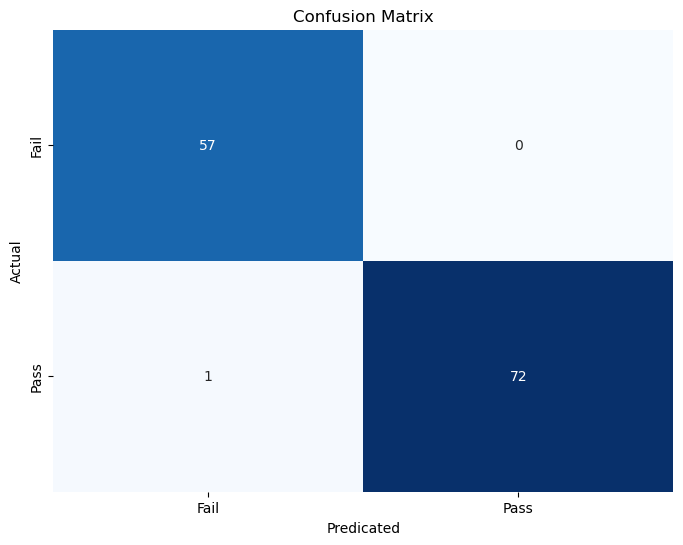

In [171]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicated')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

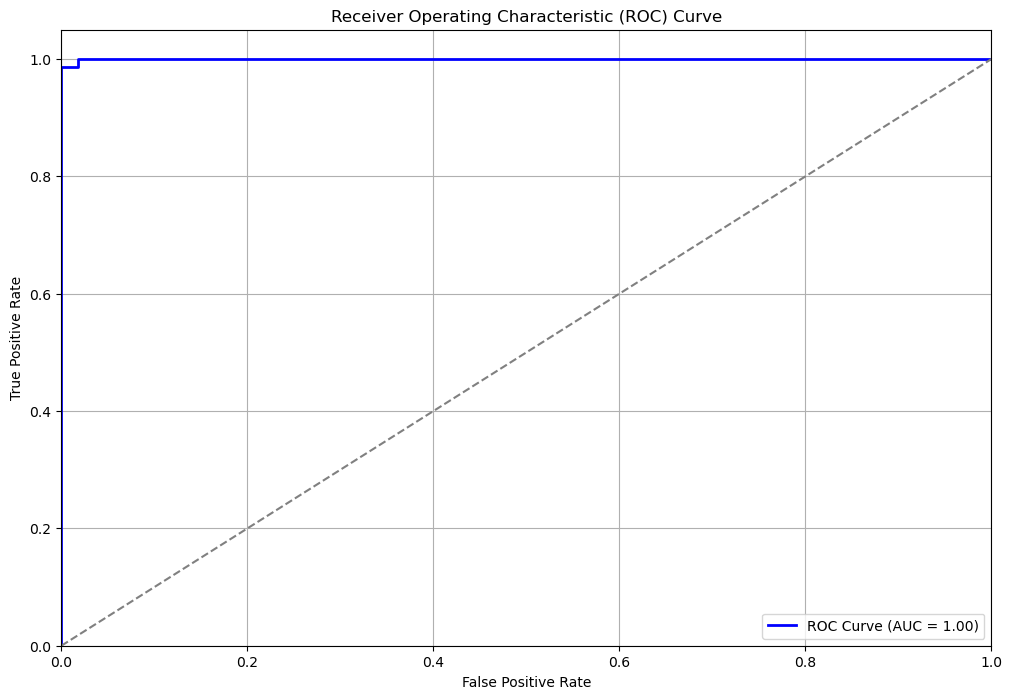

In [172]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]# Probability of positive class
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


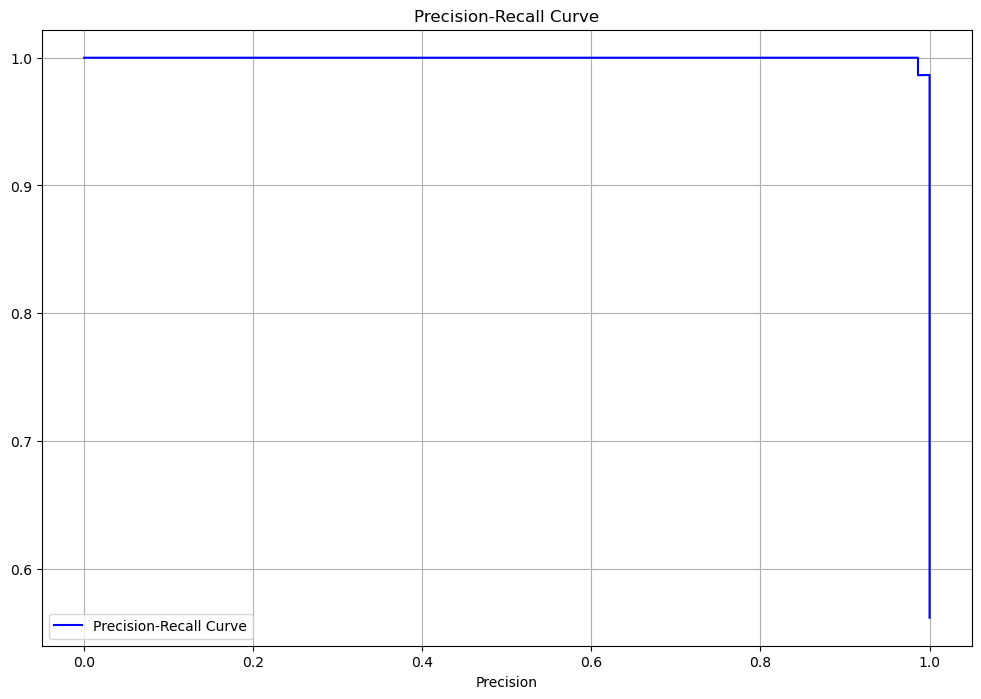

In [173]:
# Calculate Precision-Recall curve and F1 score curve for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot Precision-Recall curve
plt.figure(figsize=(12, 8))
plt.plot(recall,precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

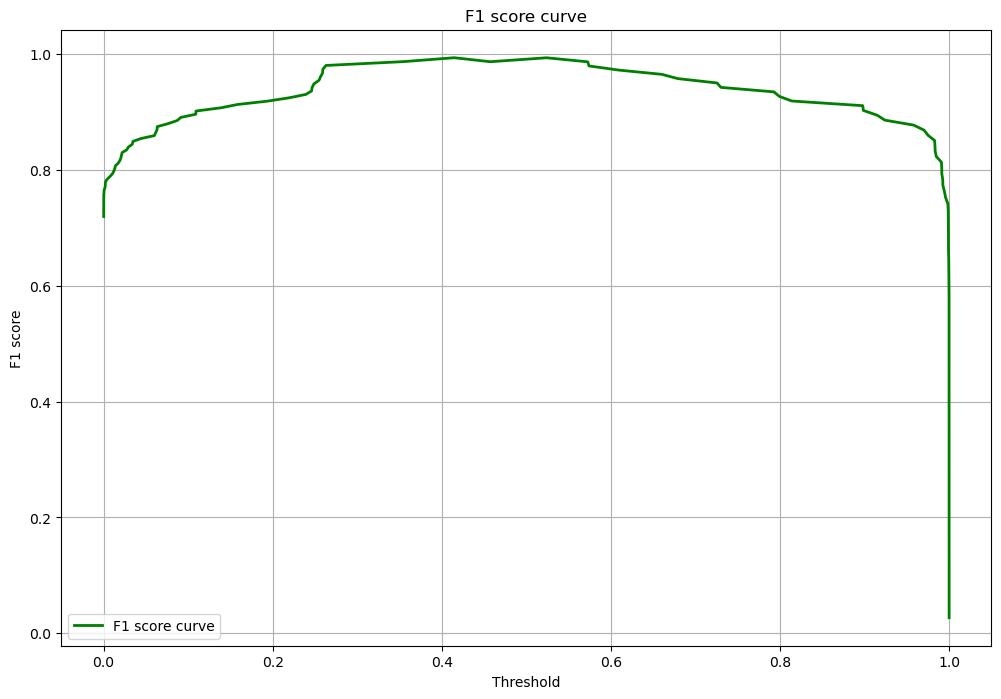

In [174]:
#plot f1 score curve
plt.figure(figsize=(12,8))
plt.plot(pr_thresholds, f1_scores[:-1], color='green', lw=2, label = 'F1 score curve')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [175]:
# save the model to a folder named 'ml_model'
if not os.path.exists('ML_MODEl'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/logistic_regression_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/logistic_regression_model.pkl


# Decision Tree

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


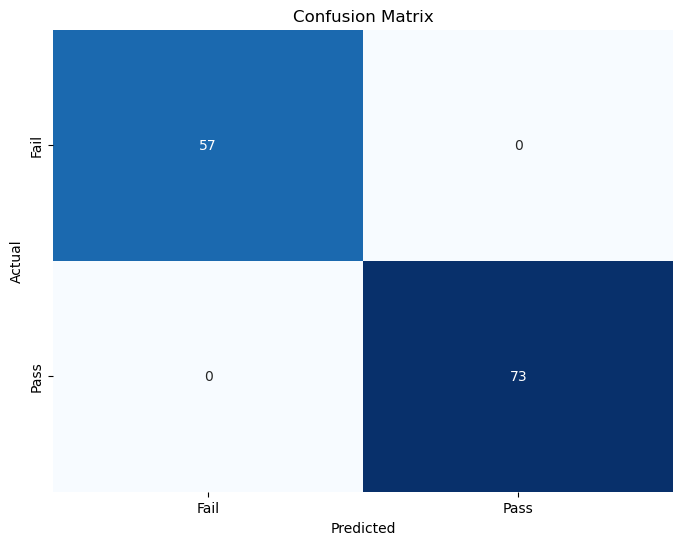

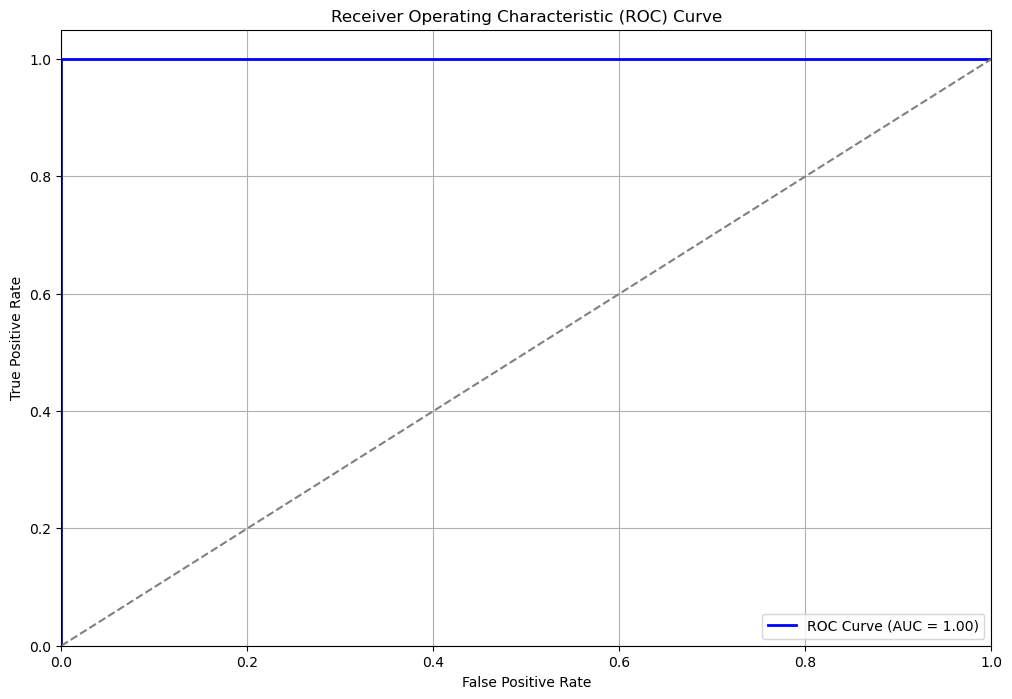

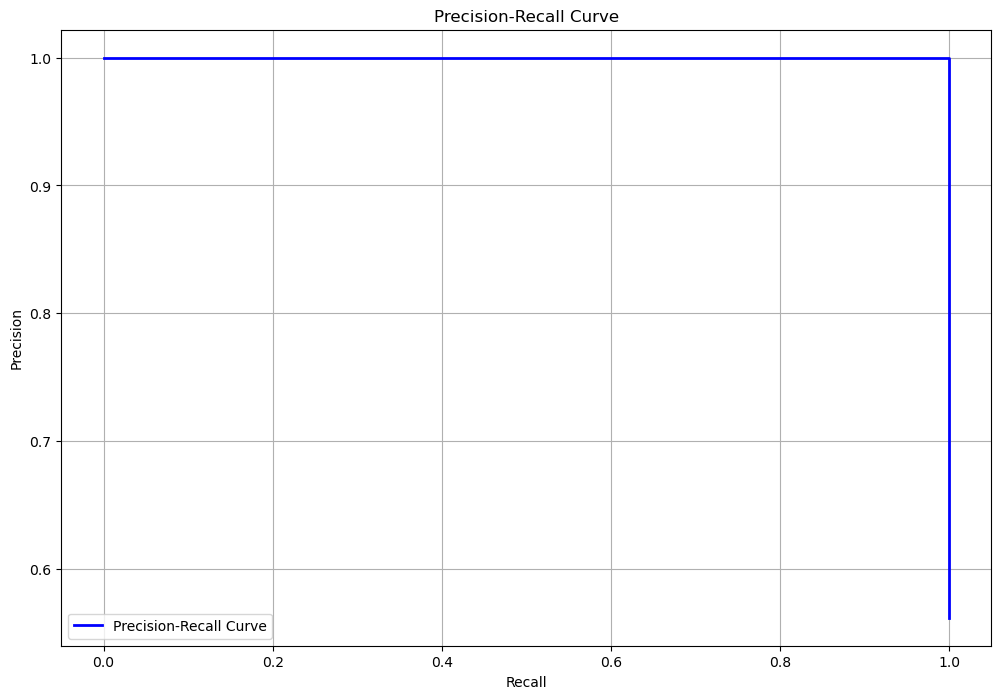

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)







# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





# Calculate Precision-Recall curve and F1 Score curve for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot Precision-Recall curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Training Accuracy: 0.87
Testing Accuracy: 0.82
Confusion Matrix:
[[38 19]
 [ 5 68]]


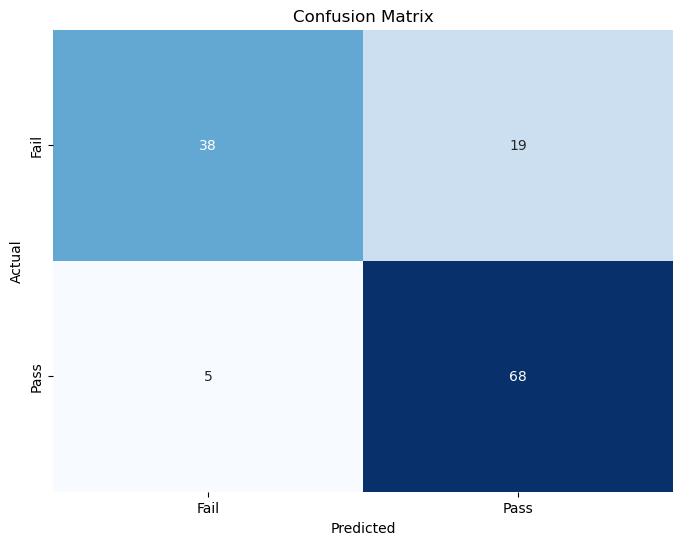

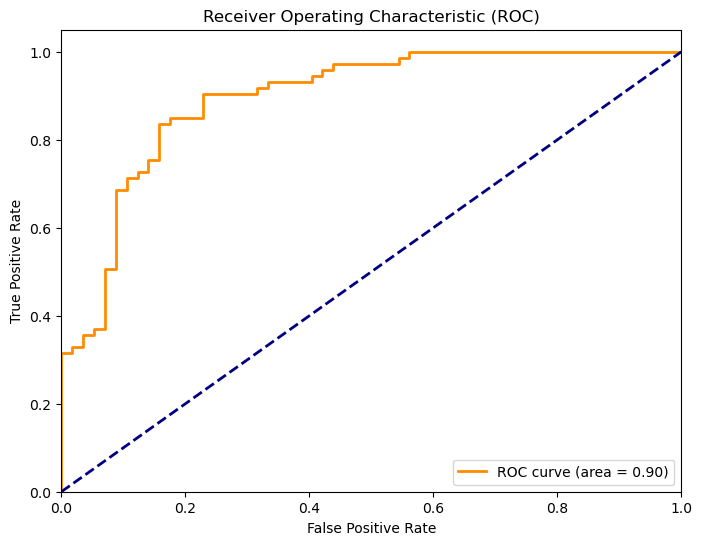

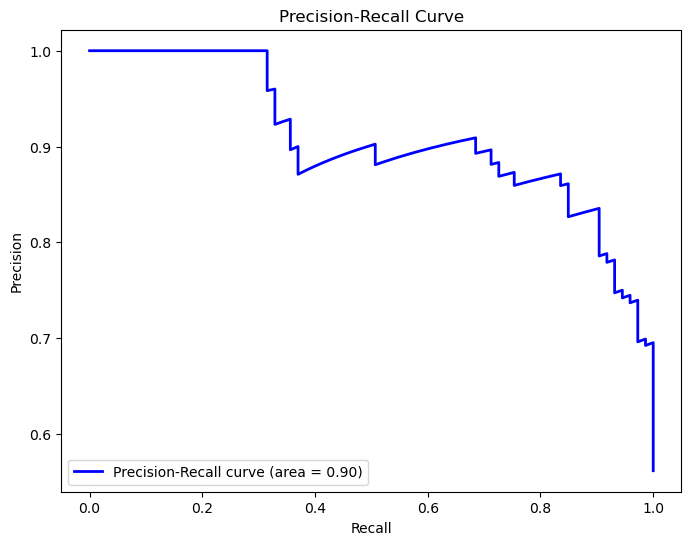

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)








# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()





# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
average_precision = roc_auc_score(y_test, y_test_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()








# Get probability estimates for the test set
y_scores_gnb = model.predict_proba(X_test)[:, 1]  # Probability of positive class

Training Accuracy: 0.87
Testing Accuracy: 0.82
Confusion Matrix:
[[38 19]
 [ 5 68]]


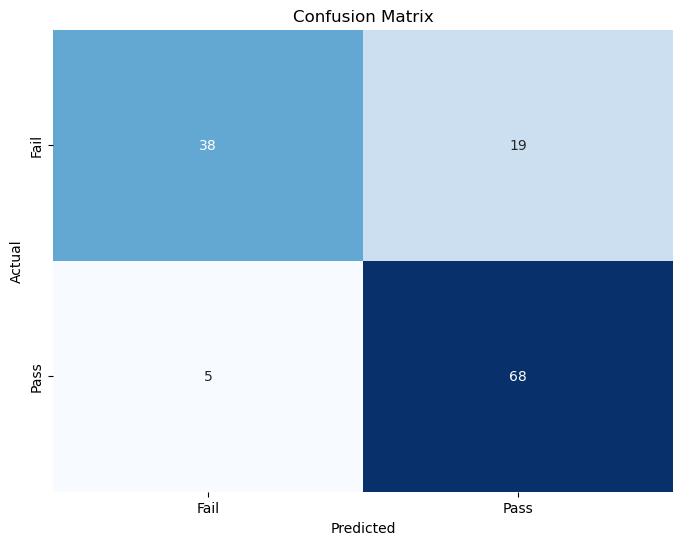

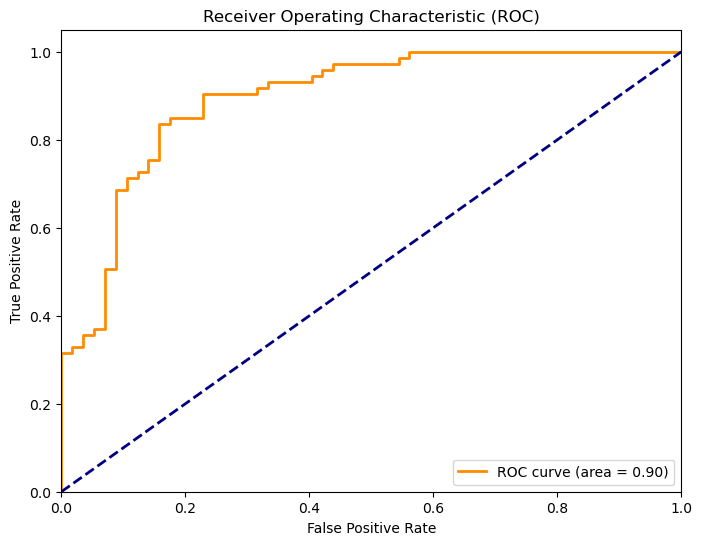

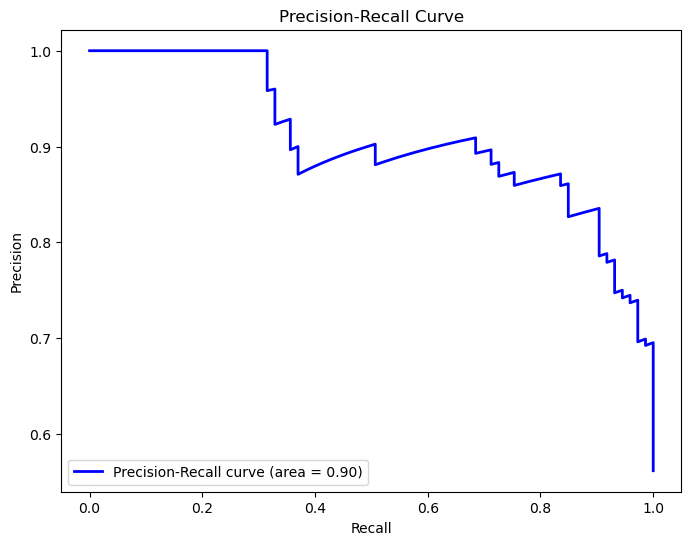

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)








# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()





# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
average_precision = roc_auc_score(y_test, y_test_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()








# Get probability estimates for the test set
y_scores_gnb = model.predict_proba(X_test)[:, 1]  # Probability of positive class

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


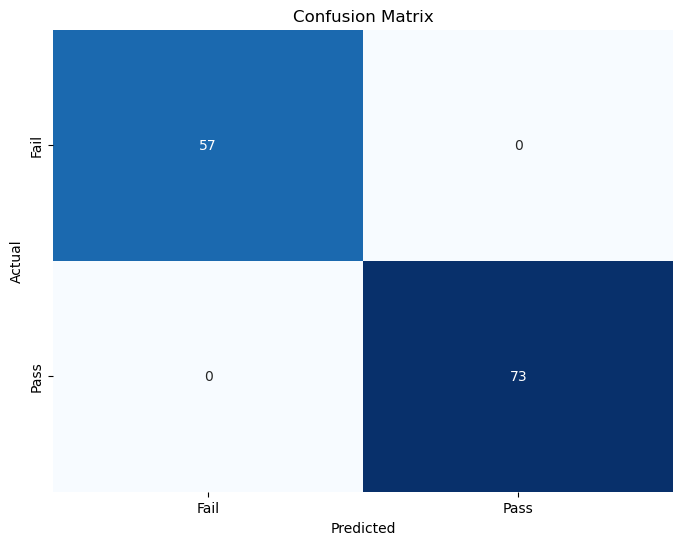

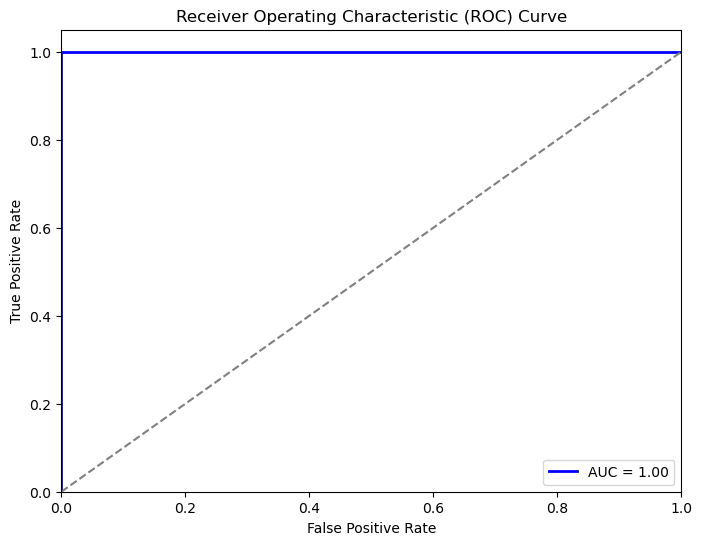

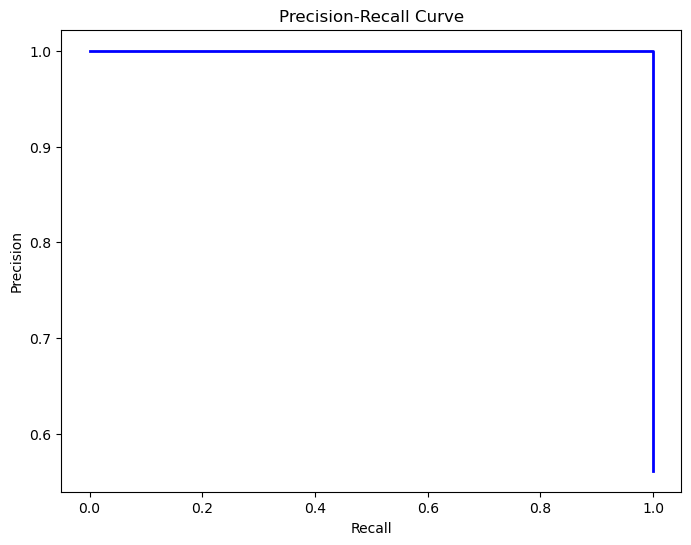

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)





# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()




import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision, recall, and F1 scores

Training Accuracy: 0.90
Testing Accuracy: 0.78
Confusion Matrix:
[[36 21]
 [ 7 66]]


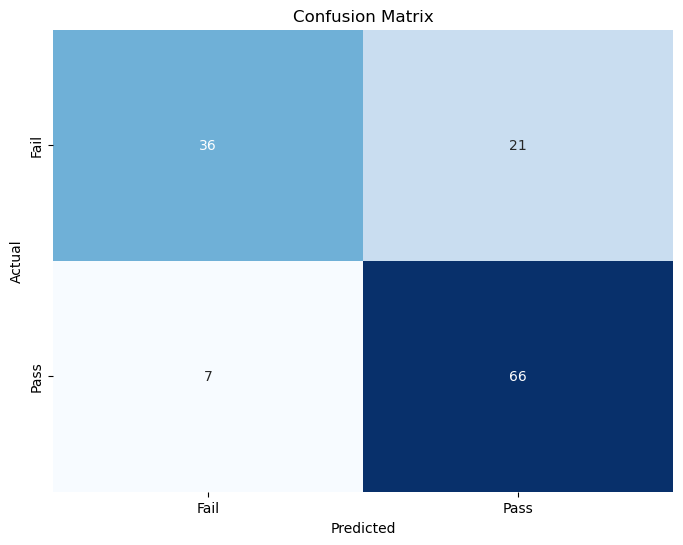

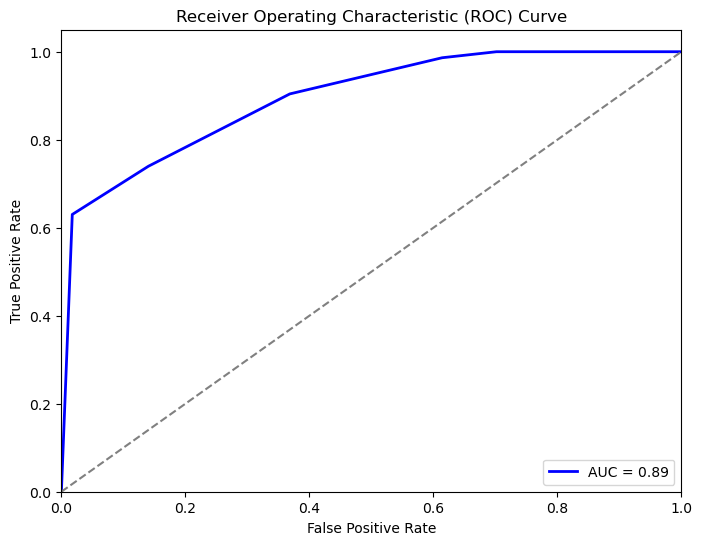

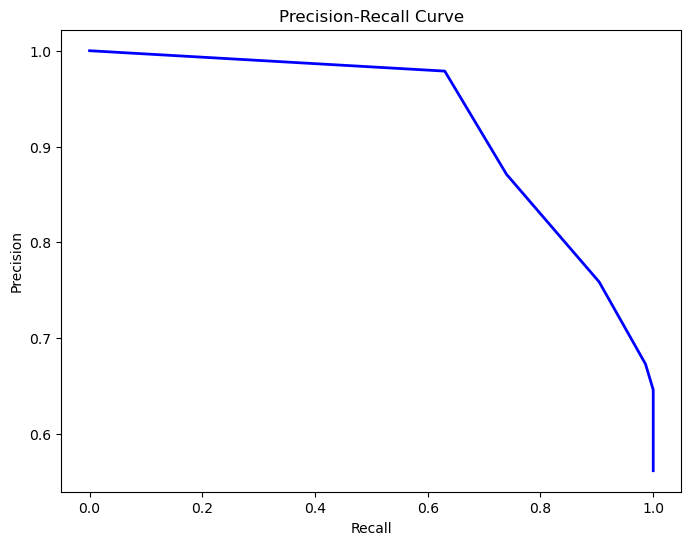

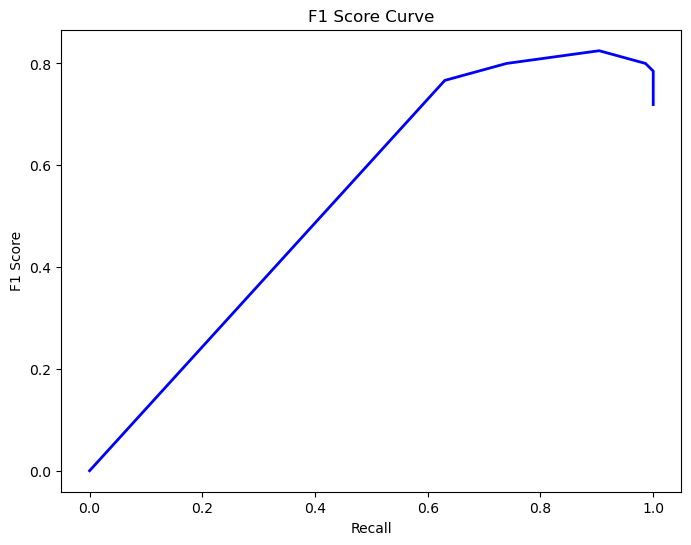

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model







# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)






# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()






# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()





# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()


Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


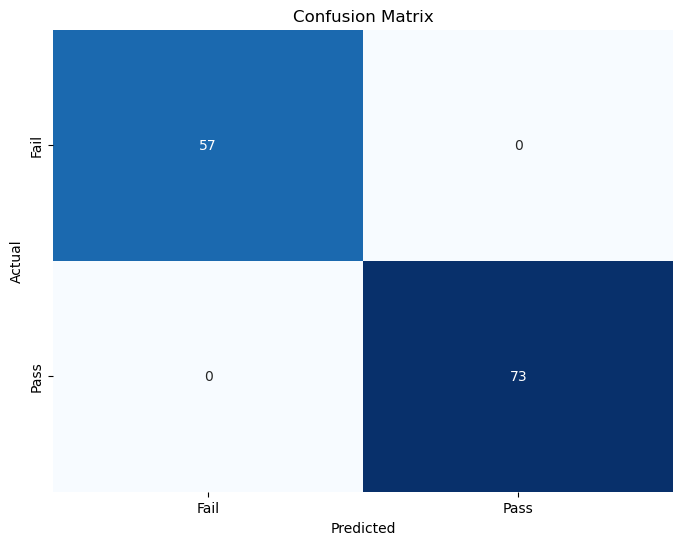

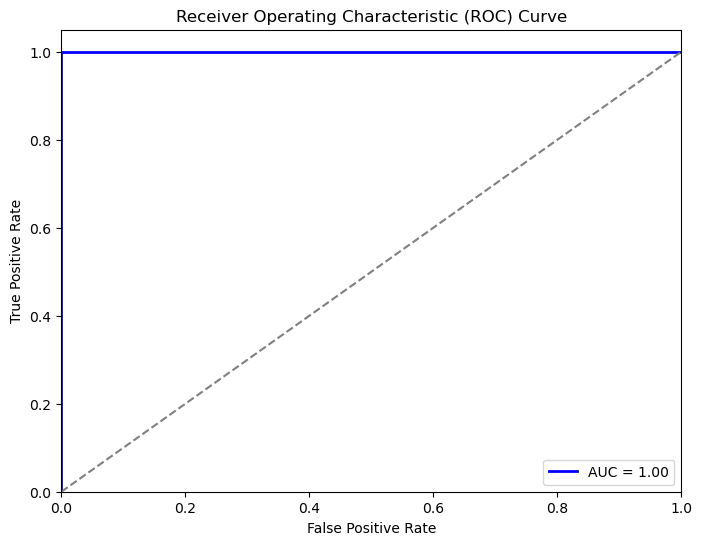

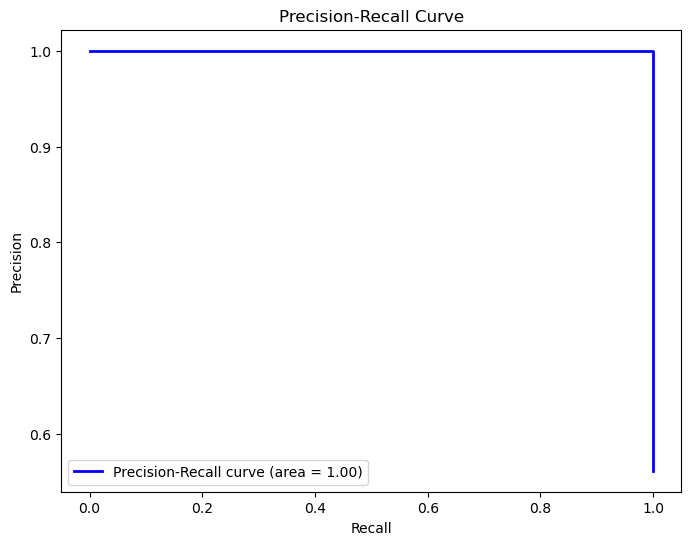

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model







# Initialize Random Forest classifier
model = RandomForestClassifier(n_estimators=100,random_state=42)

# Fit the model
model.fit(X_train, y_train)







# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')





# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = roc_auc_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model


In [203]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [204]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [206]:
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


In [207]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[57  0]
 [ 0 73]]


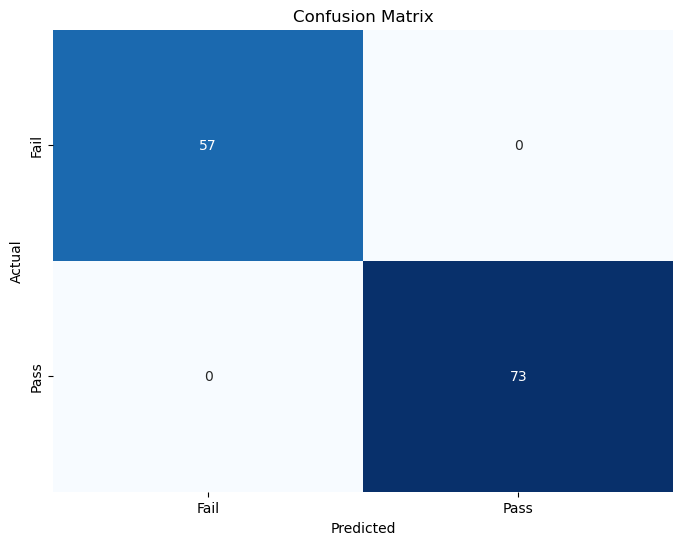

In [208]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

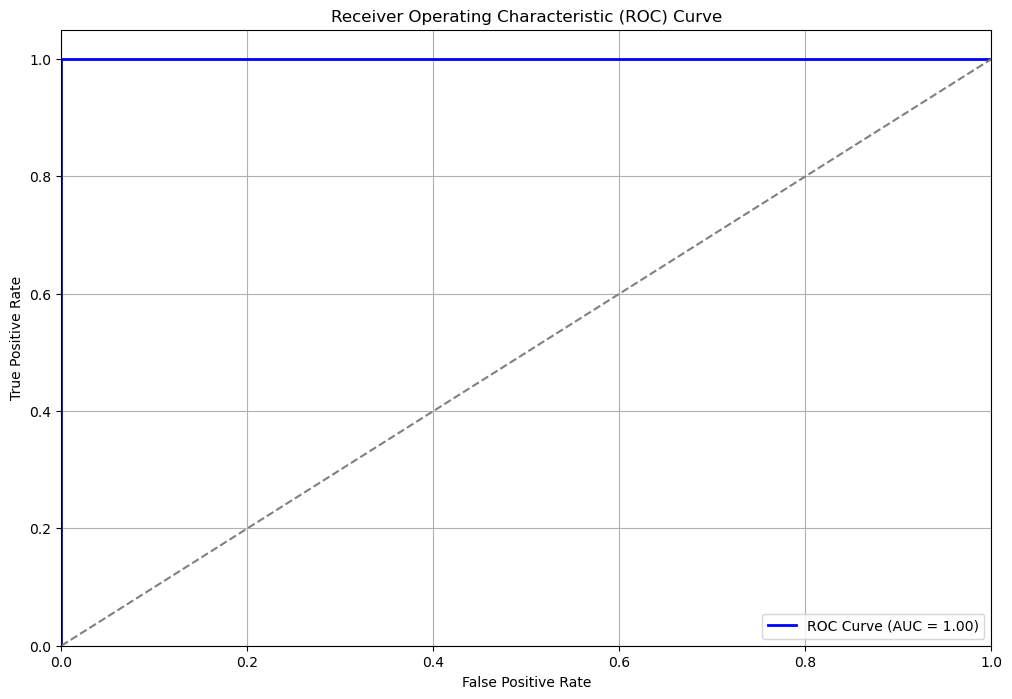

In [209]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

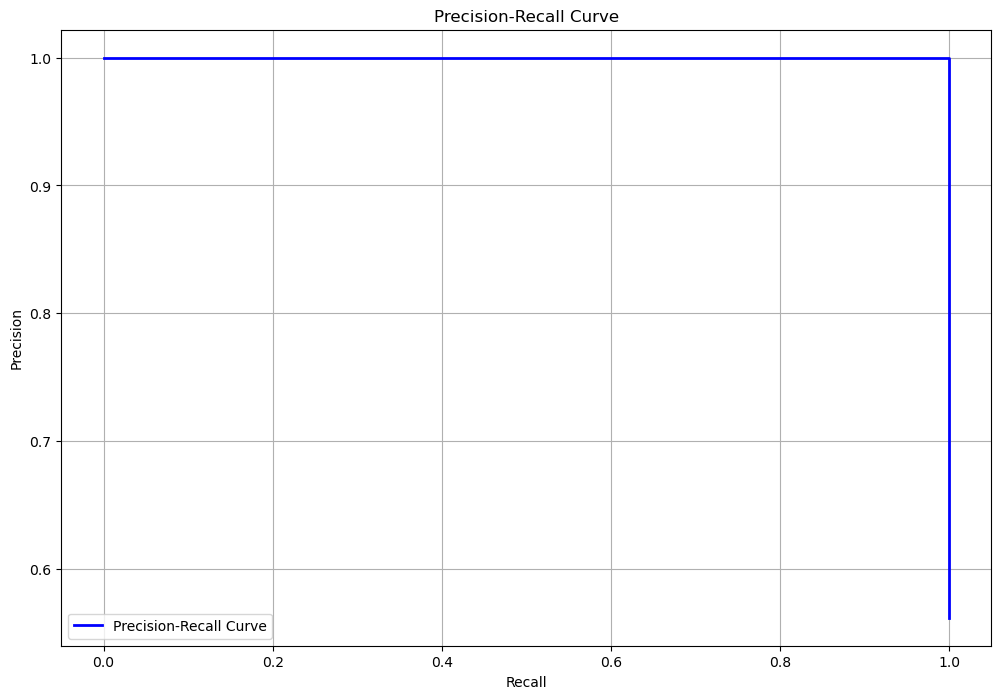

In [210]:
# Calculate Precision-Recall curve and F1 Score curve for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot Precision-Recall curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

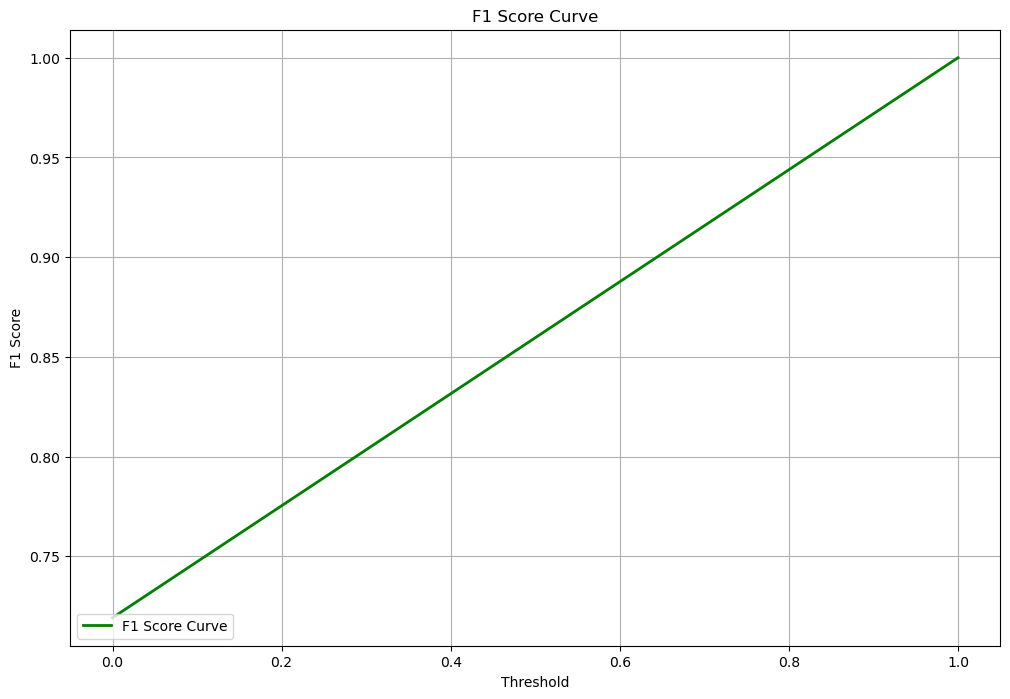

In [211]:
# Plot F1 Score curve
plt.figure(figsize=(12, 8))
plt.plot(pr_thresholds, f1_scores[:-1], color='green', lw=2, label='F1 Score Curve')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [212]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/decision_tree_model.pkl


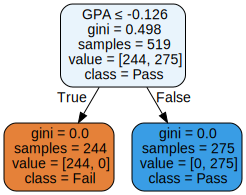

In [213]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

# Export the tree to a dot file
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,
                           class_names=['Fail', 'Pass'],
                           filled=True, rounded=True, special_characters=True)

# Create a graph from dot file
graph = graphviz.Source(dot_data)

# Display the tree
display(graph)

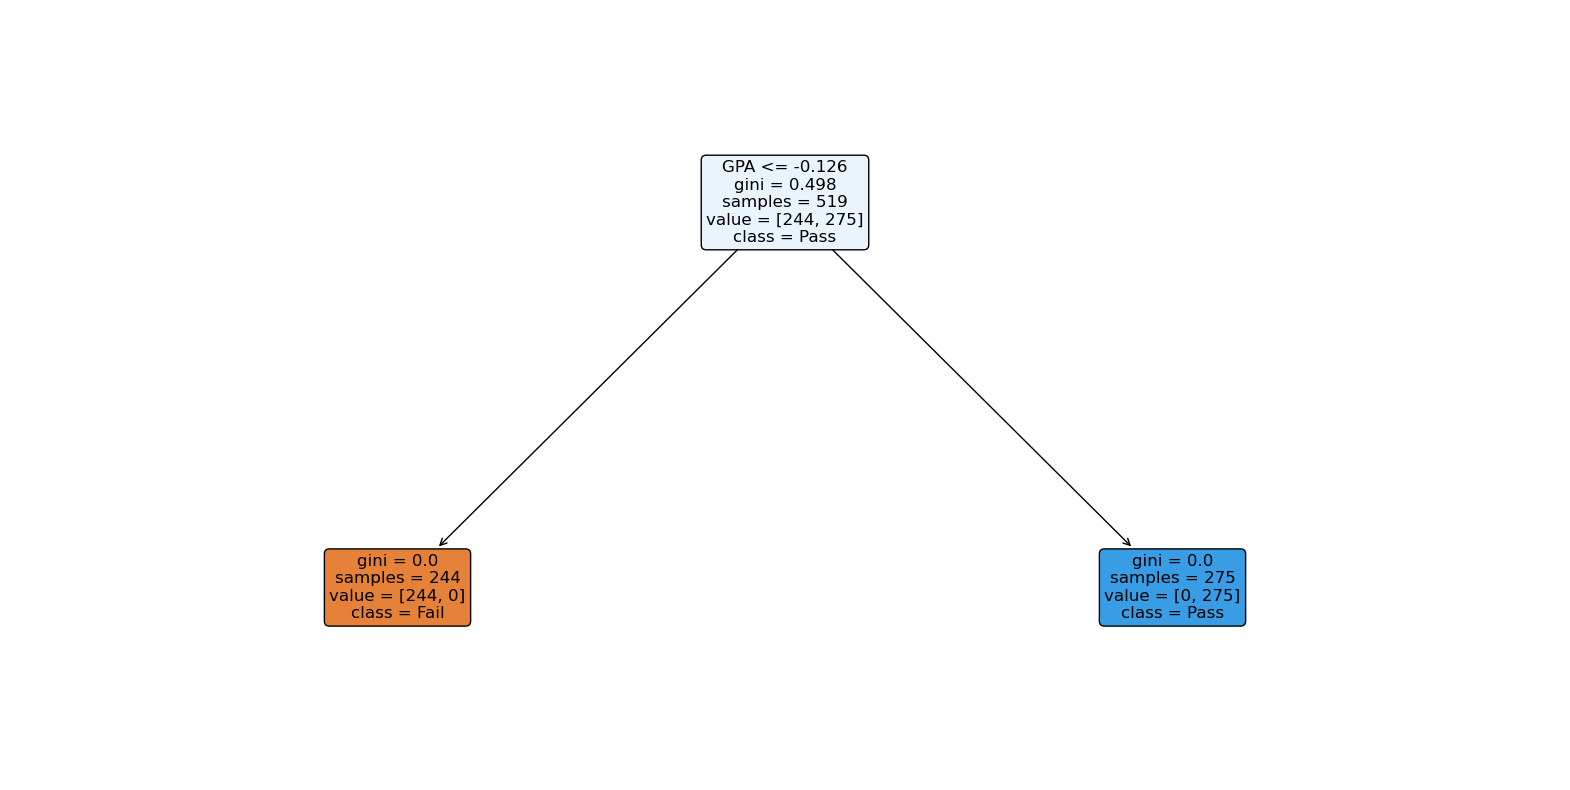

In [214]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               feature_names=X.columns,
               class_names=['Fail', 'Pass'],
               filled=True, 
               rounded=True, 
               fontsize=12)
plt.show()


In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model


In [218]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

GaussianNB()

In [219]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

In [220]:
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.87
Testing Accuracy: 0.82


In [221]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[38 19]
 [ 5 68]]


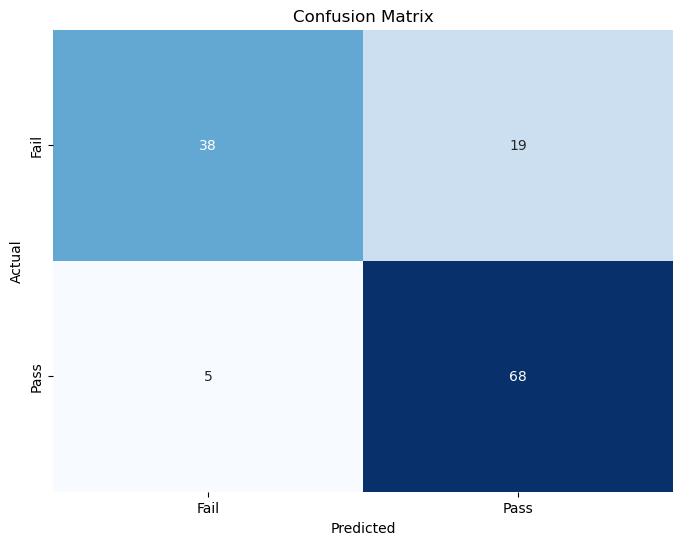

In [222]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

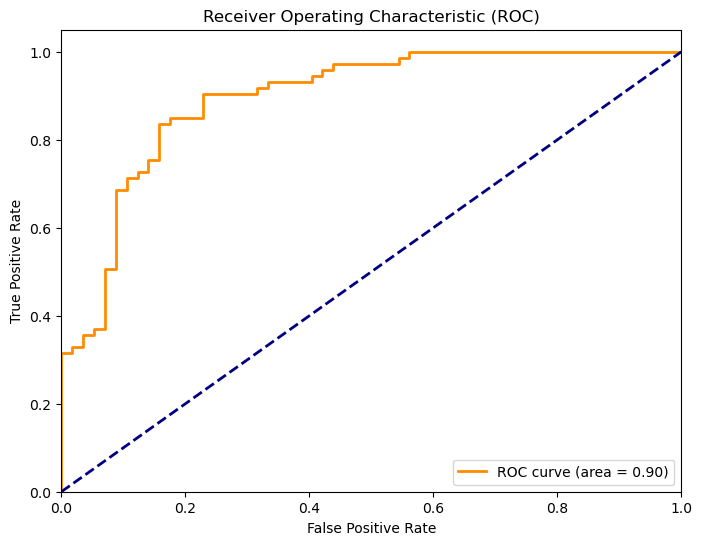

In [223]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


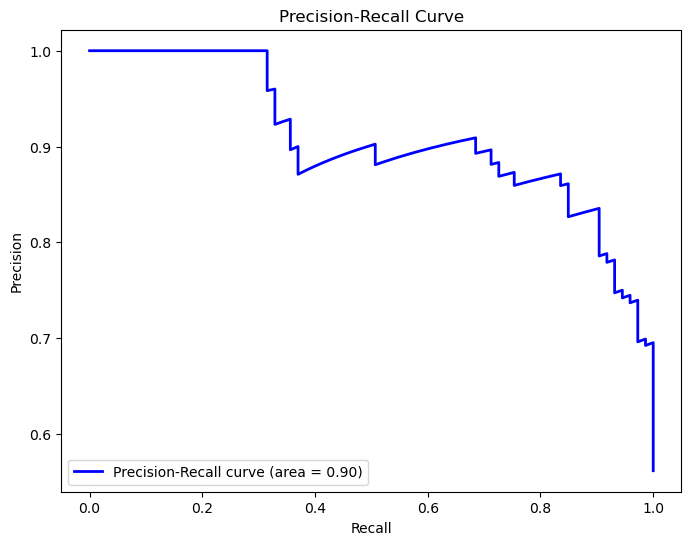

In [224]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
average_precision = roc_auc_score(y_test, y_test_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

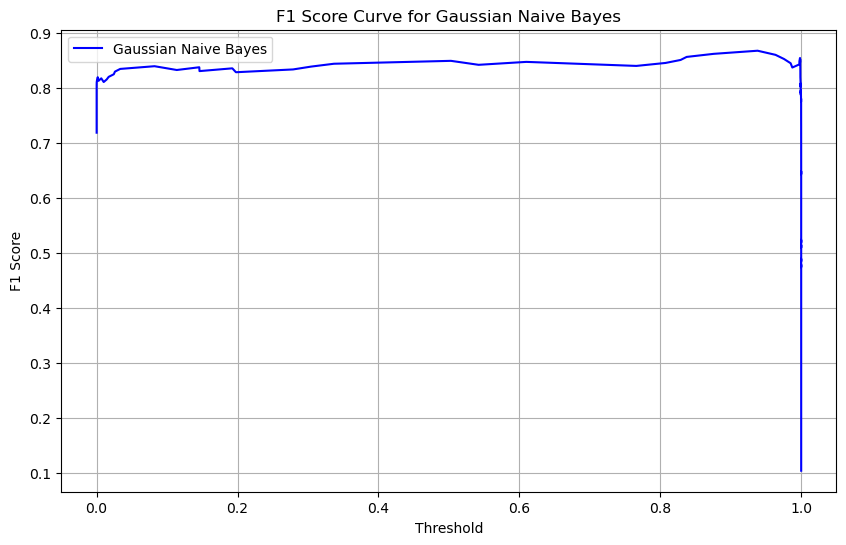

In [225]:
# Get probability estimates for the test set
y_scores_gnb = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision, recall, and thresholds
precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y_test, y_scores_gnb)

# Calculate F1 scores for each threshold
f1_scores_gnb = 2 * (precision_gnb * recall_gnb) / (precision_gnb + recall_gnb + 1e-10)

# Plot F1 Score Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds_gnb, f1_scores_gnb[:-1], label='Gaussian Naive Bayes', color='blue')

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve for Gaussian Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


In [226]:
# Save the model to a file
model_filename = 'ML_MODEL/gaussian_naive_bayes_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as ML_MODEL/gaussian_naive_bayes_model.pkl


In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [229]:
#Initialize Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [230]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


Confusion Matrix:
[[57  0]
 [ 0 73]]


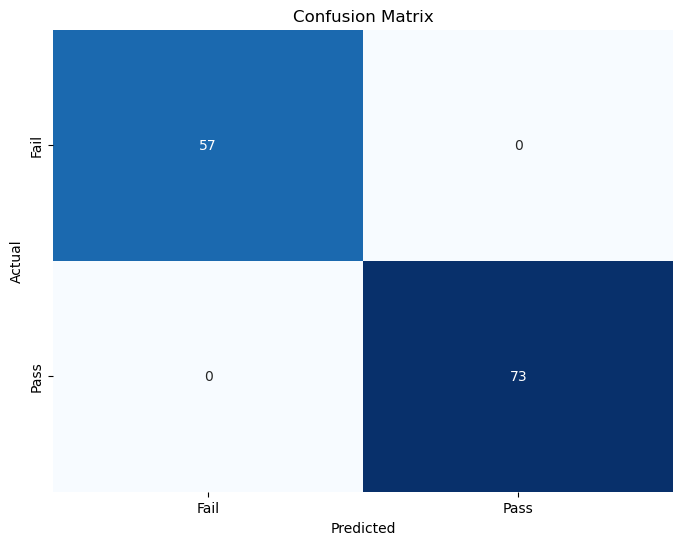

In [231]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

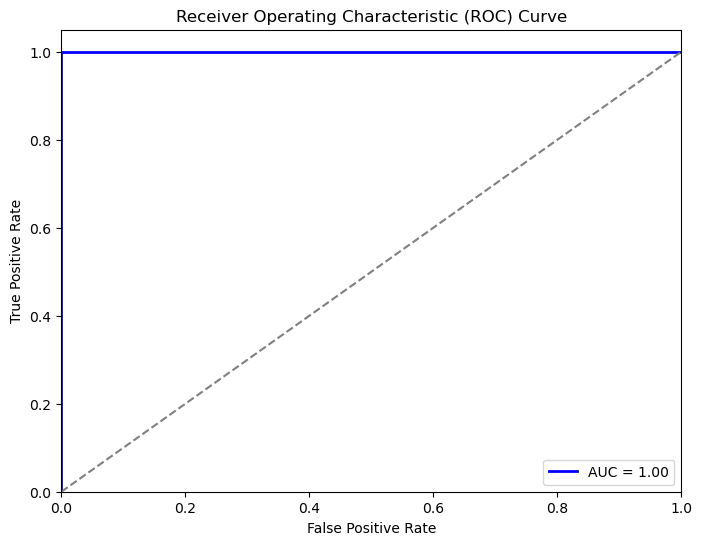

In [232]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

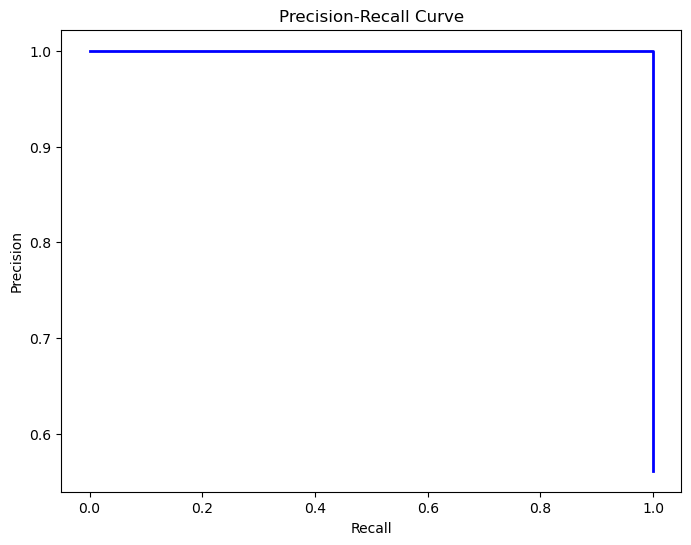

In [233]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

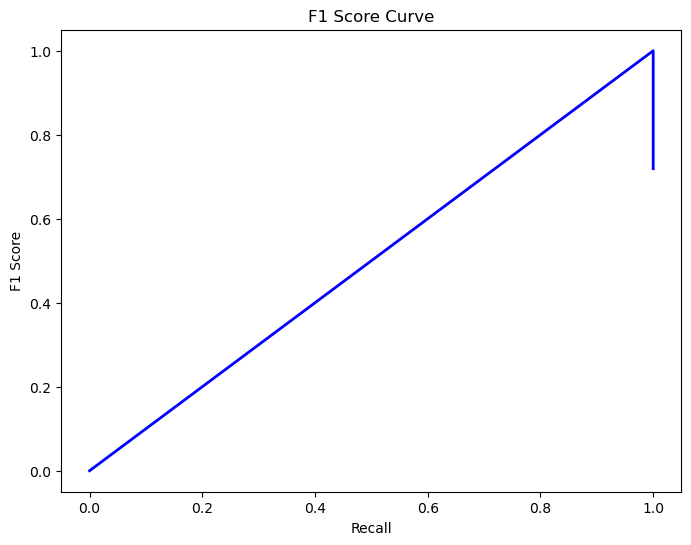

In [234]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision, recall, and F1 scores
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Plot F1 Score Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()

In [235]:
import joblib
import os

# Define model save path
model_path = 'ML_MODEL/gradient_boosting_model.pkl'

# Create directory if it does not exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to ML_MODEL/gradient_boosting_model.pkl


In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [237]:
# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)

KNeighborsClassifier()

Training Accuracy: 0.90
Testing Accuracy: 0.78
Confusion Matrix:
[[36 21]
 [ 7 66]]


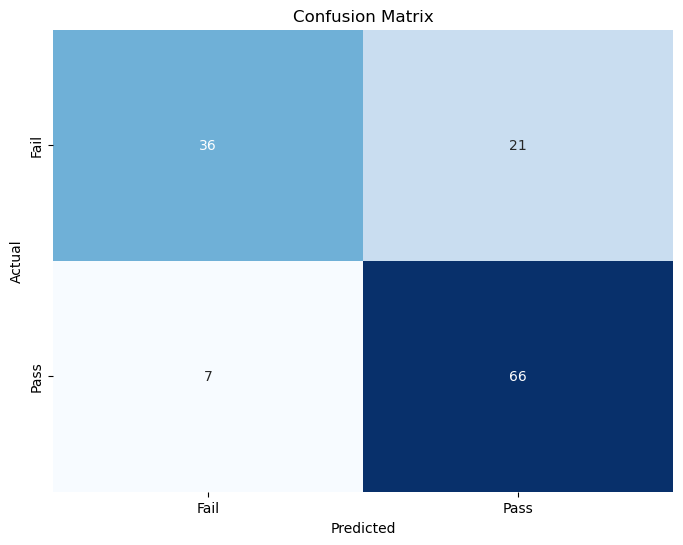

In [238]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

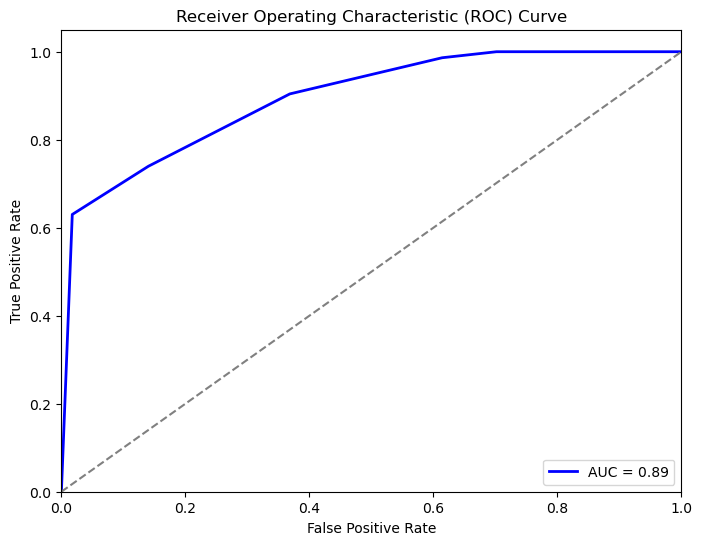

In [239]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

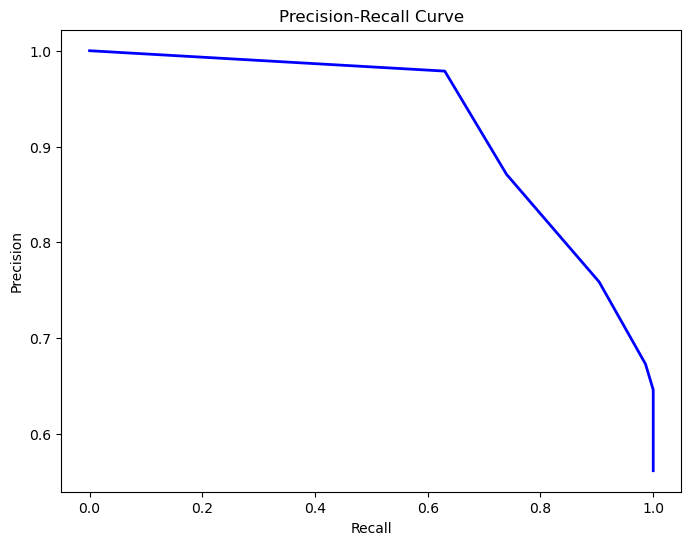

In [240]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

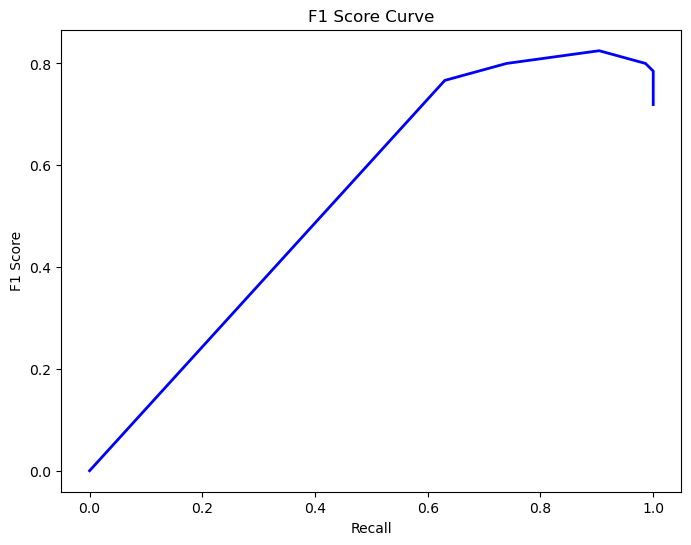

In [241]:
# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()

In [242]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/knn_model.pkl


In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [244]:
# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)

KNeighborsClassifier()

Training Accuracy: 0.90
Testing Accuracy: 0.78
Confusion Matrix:
[[36 21]
 [ 7 66]]


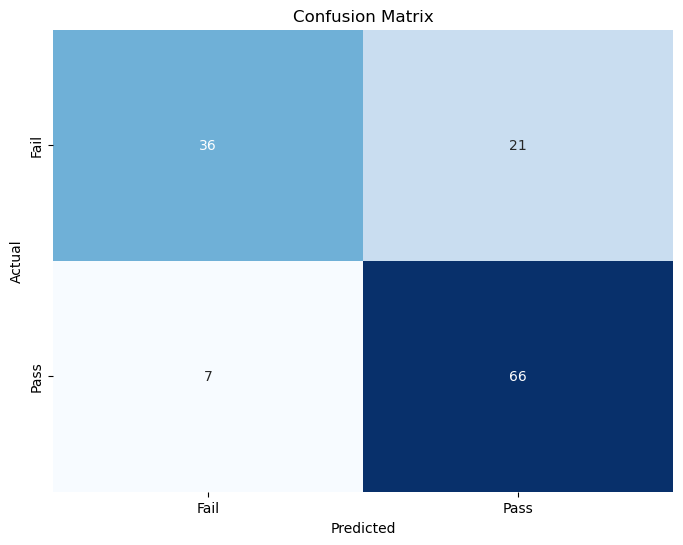

In [245]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

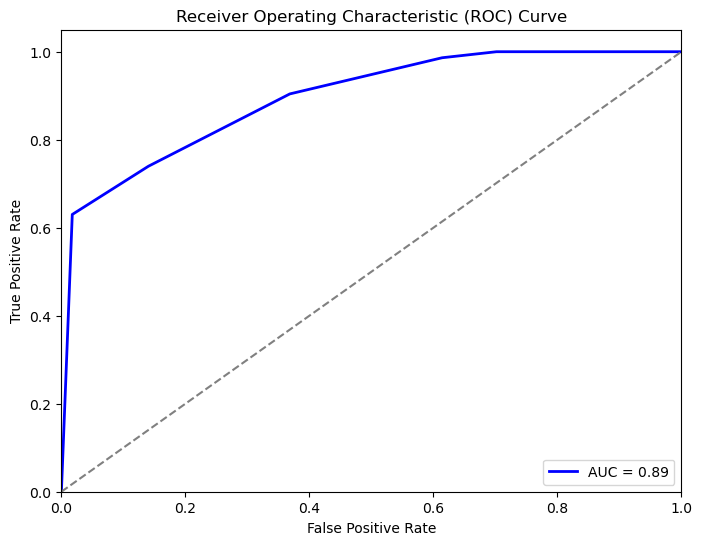

In [246]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

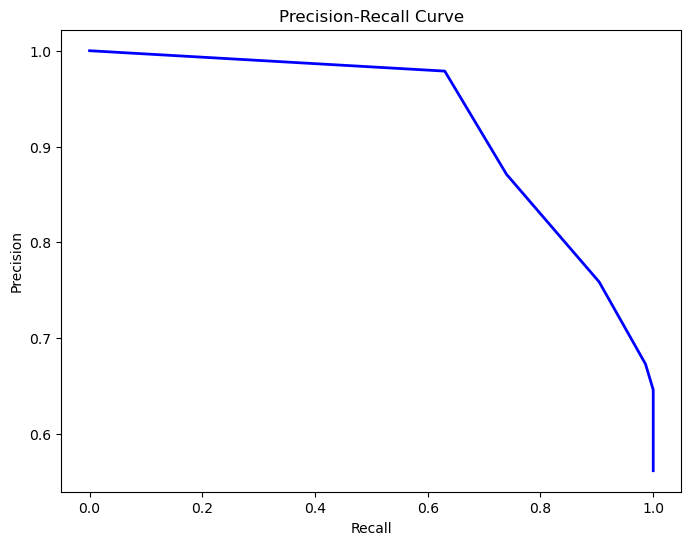

In [247]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

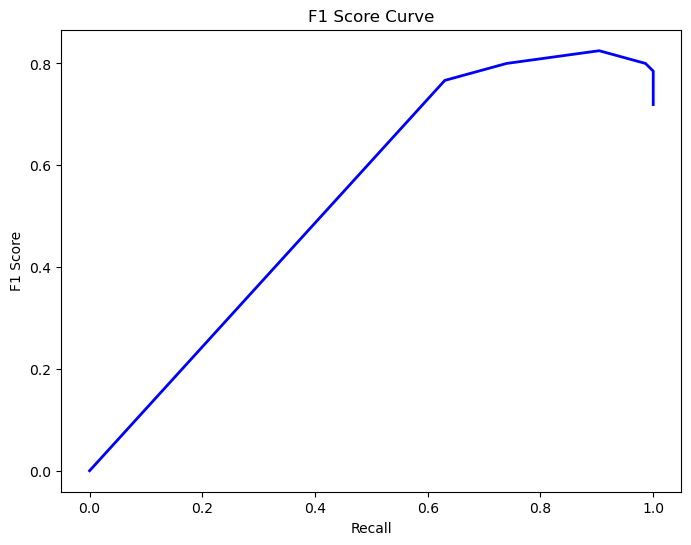

In [248]:
# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()

In [249]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/knn_model.pkl


In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [251]:
# Initialize MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Fit the model
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 0.97
Confusion Matrix:
[[55  2]
 [ 2 71]]


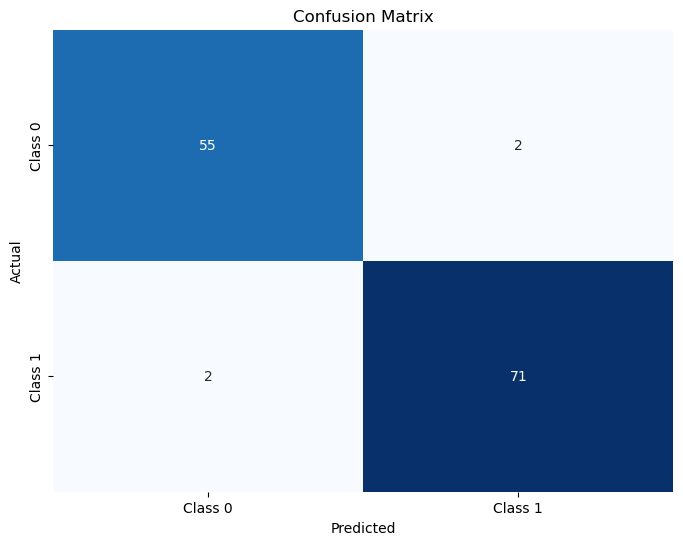

In [252]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

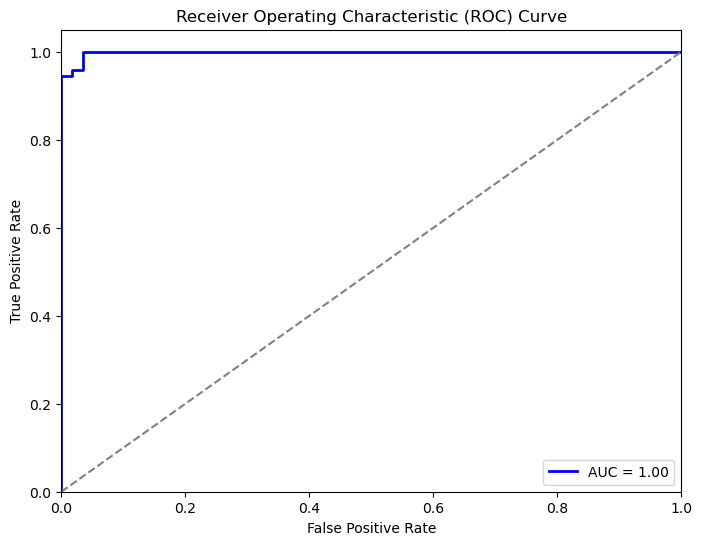

In [253]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

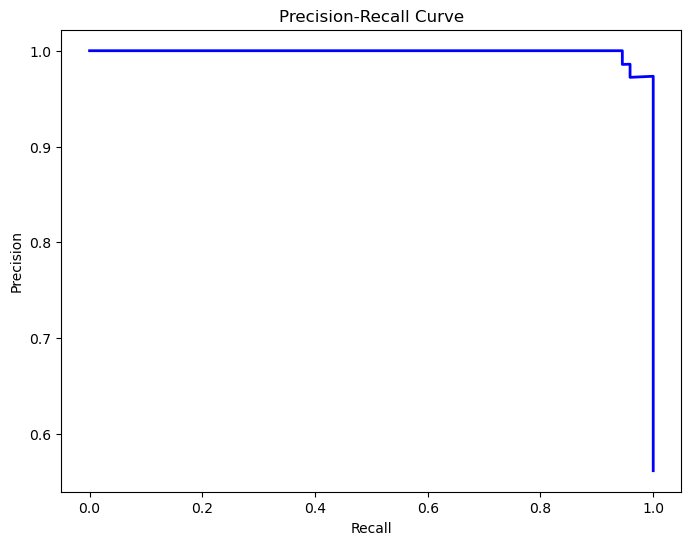

In [254]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

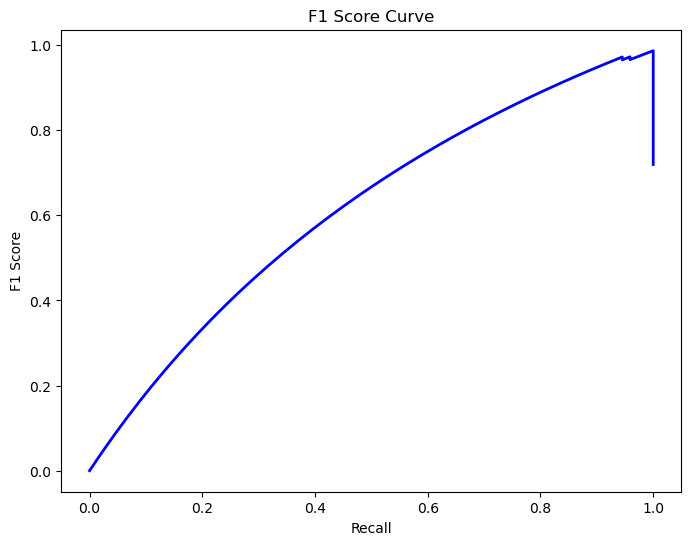

In [255]:
# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()

In [256]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/mlp_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/mlp_model.pkl
